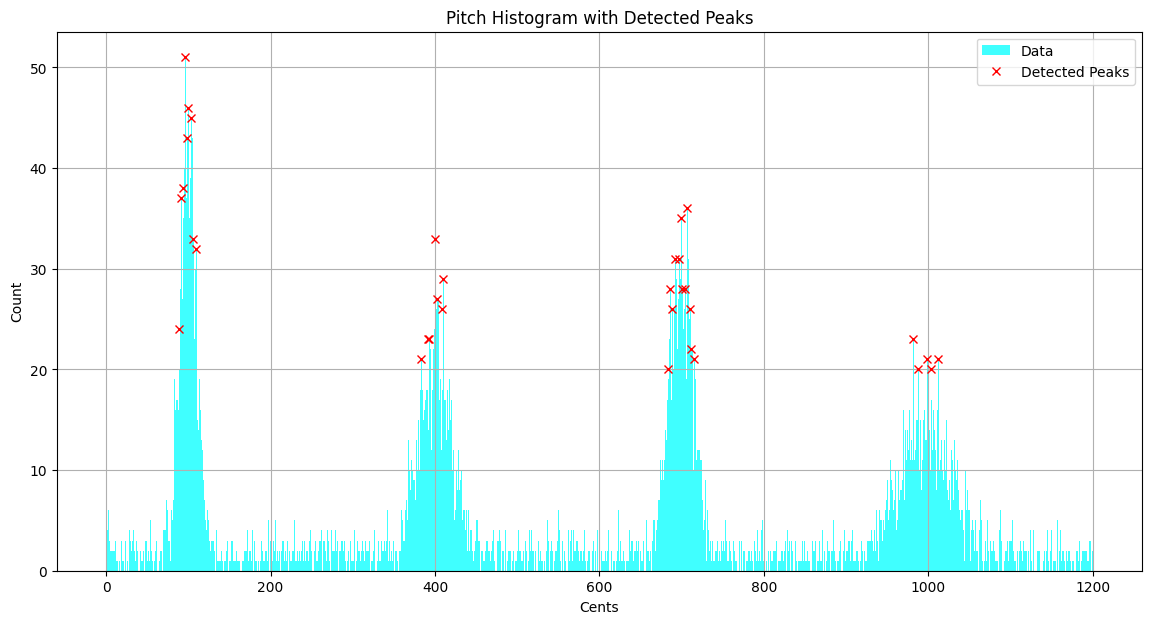

[(97.97435897435898, 14.786391605994961),
 (98.25277067348678, 14.809569942729121),
 (98.43424423569599, 14.598174283276286),
 (98.81399317406144, 14.56011577655118),
 (99.15076660988075, 14.653488119320803),
 (99.36421861656704, 14.452945257274187),
 (99.92431972789116, 14.850023032340365),
 (100.60051107325383, 14.90469838038846),
 (100.86819727891157, 15.154240178565617),
 (395.8914623069936, 20.712606343264714),
 (398.4457777777778, 20.477059086682985),
 (399.02846975088966, 20.247360202437118),
 (400.29769299023957, 20.17351250830167),
 (401.05193661971833, 20.610466192496457),
 (401.9297012302285, 20.867286649384322),
 (402.382612533098, 20.807981602790907),
 (696.815834767642, 18.082215391366994),
 (697.2032590051458, 18.008224907969243),
 (697.6520618556701, 17.645859619982605),
 (698.3360655737705, 17.062207971477903),
 (699.1571675302246, 16.79771181445973),
 (699.460310612597, 16.829710321786706),
 (699.806632213609, 16.950270246816103),
 (700.4175965665236, 17.2694398583680

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Generate dummy data: Gaussian peaks centered at 100, 400, 700, and 1000 with noise
np.random.seed(0)
data = np.concatenate([
    np.random.normal(100, 10, 1000),
    np.random.normal(400, 20, 1000),
    np.random.normal(700, 15, 1000),
    np.random.normal(1000, 30, 1000),
    np.random.uniform(0, 1200, 2000)
])

# Plot the histogram
bins = 1200
hist, bin_edges = np.histogram(data, bins=bins, range=(0, 1200))

# Detect peaks in the histogram
peaks, _ = find_peaks(hist, height=20)  # Adjust height threshold if necessary

# Calculate the mean and standard deviation of the peaks
peak_stats = []
for peak in peaks:
    # Get the bin centers around the peak for fitting
    left_base = max(peak - 50, 0)
    right_base = min(peak + 50, bins)
    bin_centers = (bin_edges[left_base:right_base] + bin_edges[left_base+1:right_base+1]) / 2
    counts = hist[left_base:right_base]
    
    # Calculate mean and standard deviation
    mean = np.average(bin_centers, weights=counts)
    std_dev = np.sqrt(np.average((bin_centers - mean)**2, weights=counts))
    peak_stats.append((mean, std_dev))

# Plot histogram with detected peaks
plt.figure(figsize=(14, 7))
plt.hist(data, bins=bins, range=(0, 1200), color='cyan', alpha=0.75, label='Data')
plt.plot(bin_edges[peaks], hist[peaks], 'rx', label='Detected Peaks')
plt.xlabel('Cents')
plt.ylabel('Count')
plt.title('Pitch Histogram with Detected Peaks')
plt.legend()
plt.grid(True)
plt.show()

# Display the results
peak_stats
